# Examen Python Data Developer
# Deel 2

Ga verder met de verwerkte data die je uit deel 1 hebt. We gaan nu op basis van dezelfde dataset een aantal onderzoeksvragen oplossen!

### Onderzoek 1: Unisex namen
#### Een aantal statistieken
Sommige namen zijn unisex, dat wil zeggen dat zij hetzelfde zijn voor mannen en vrouwen. Beantwoord volgende 3 vragen over unisex namen in onze dataset:
 - Hoeveel unisex namen zijn er?
 - Wat is de meest voorkomende unisex naam; hiervoor zoek ik 3 namen (en getallen):
    - De meest populaire unisex naam bij mannen.
    - De meest populaire unisex naam bij vrouwen.
    - De meest popuaire unisex naam.

**Tip:** Neem hiervoor terug de volledige dataset in acht (dus met de foutief geklasseerde namen).

In [1]:
# Import packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define data locaties
input_dir = os.getenv("INPUT_DIRECTORY")
output_dir = os.getenv("OUTPUT_DIRECTORY")
intermediate_dir = os.getenv("INTERMEDIATE_DIRECTORY")
scripts_dir = os.getenv("SCRIPTS_DIRECTORY")

source_data = pd.read_csv(os.path.join(intermediate_dir, 'source_combined.csv'))
date_filtered_data = pd.read_csv(os.path.join(intermediate_dir, 'cleaned_data_without_feb29_and_fliers.csv'))
date_filtered_data["bron_datum"] = pd.to_datetime(date_filtered_data["bron_datum"], format="%Y-%m-%d")
date_filtered_data["verwachte_datum"] = pd.to_datetime(date_filtered_data["verwachte_datum"], format="%Y-%m-%d")

In [2]:
unisex_namen = source_data.groupby('naam')['geslacht'].nunique()
unisex_namen = unisex_namen[unisex_namen >= 2].index.tolist() # index van de groep is naam
unisex_namen_df = source_data[source_data['naam'].isin(unisex_namen)]

unisex_samen_counts = source_data[source_data['naam'].isin(unisex_namen)]['naam'].value_counts().sort_values(ascending=False)
unisex_mannen_counts = unisex_namen_df[unisex_namen_df['geslacht'] == 'Mannelijk']['naam'].value_counts().sort_values(ascending=False)
unisex_vrouwen_counts = unisex_namen_df[unisex_namen_df['geslacht'] == 'Vrouwelijk']['naam'].value_counts().sort_values(ascending=False)


print(f"Populairse unisex naam bij de mannen: {unisex_mannen_counts.index[0]}")
print(f"Populairse unisex naam bij de vrouwen: {unisex_vrouwen_counts.index[0]}")
print(f"Populairse unisex naam in het algemeen: {unisex_samen_counts.index[0]}")


Populairse unisex naam bij de mannen: Maxime
Populairse unisex naam bij de vrouwen: Dominique
Populairse unisex naam in het algemeen: Dominique


We zien dat er een vrij groot aantal namen veel meer voorkomen bij mannen dan vrouwen (en omgekeerd). Dit vinden we eigenlijk geen "echte" unisex namen. We noemen een naam "echt unisex" als de naam niet meer dan 50% meer voorkomt bij 1 van de 2 geslachten. Dus als er `x` mannen en `y` vrouwen zijn genaamd Chris, dan noemen we Chris "echt unisex" als `x <= 1.5 * y` en `y <= x * 1.5`. Filter je unisex dataframe tot een `df_real_unisex` waarbij je enkel de "echte" unisex namen weerhoudt. 
- Beantwoord nu bovenstaande 3 vragen opnieuw voor deze dataset. Hierbij werk je best met een functie zodat je geen code moet herhalen!
- Zijn de echte unisex namen populairder bij mannen of vrouwen, of is de populariteit hetzelfde? Deze vraag kan je beantwoorden door te kijken naar het percentage mannen/vrouwen met een echte unisex naam.

In [3]:
echte_unisex_namen_grouped = source_data.groupby(['naam', 'geslacht']).size()
echte_unisex_namen_grouped = echte_unisex_namen_grouped.unstack(fill_value=0)
# display(echte_unisex_namen.head())

echte_unisex_namen = []
for name in echte_unisex_namen_grouped.index:
    counts = echte_unisex_namen_grouped.loc[name]
    if (counts['Mannelijk'] <=  counts['Vrouwelijk'] * 1.5) and (counts['Vrouwelijk'] <=  counts['Mannelijk'] * 1.5):
        echte_unisex_namen.append(name)

echte_unisex_namen_df = source_data[source_data['naam'].isin(echte_unisex_namen)]

echte_unisex_samen_counts = echte_unisex_namen_df[echte_unisex_namen_df['naam'].isin(unisex_namen)]['naam'].value_counts().sort_values(ascending=False)
echte_unisex_mannen_counts = echte_unisex_namen_df[echte_unisex_namen_df['geslacht'] == 'Mannelijk']['naam'].value_counts().sort_values(ascending=False)
echte_unisex_vrouwen_counts = echte_unisex_namen_df[echte_unisex_namen_df['geslacht'] == 'Vrouwelijk']['naam'].value_counts().sort_values(ascending=False)

print(f"Populairse echte unisex naam bij de mannen: {echte_unisex_mannen_counts.index[0]}")
print(f"Populairse echte unisex naam bij de vrouwen: {echte_unisex_vrouwen_counts.index[0]}")
print(f"Populairse echte unisex naam in het algemeen: {echte_unisex_samen_counts.index[0]}")


Populairse echte unisex naam bij de mannen: Dominique
Populairse echte unisex naam bij de vrouwen: Dominique
Populairse echte unisex naam in het algemeen: Dominique


In [4]:
# Count occurrences of males and females with the name 'Dominique'
unisex_mannen_totaal = echte_unisex_namen_df.groupby('geslacht').size()['Mannelijk']
unisex_vrouwen_totaal = echte_unisex_namen_df.groupby('geslacht').size()['Vrouwelijk']
# Calculate percentage of males and females with the name 'Dominique'
percentage_mannen = (unisex_mannen_totaal / len(echte_unisex_namen_df)) * 100
percentage_vrouwen = (unisex_vrouwen_totaal / len(echte_unisex_namen_df)) * 100

print(f"Percentage mannen met unisex naam: {percentage_mannen:.0f}%")
print(f"Percentage vrouwen met unisex naam: {percentage_vrouwen:.0f}%")


Percentage mannen met unisex naam: 44%
Percentage vrouwen met unisex naam: 56%


#### Visualizatie

Maak een visualizatie die alle echte unisex namen toont en de relatieve voorkomens bij mannen en vrouwen.

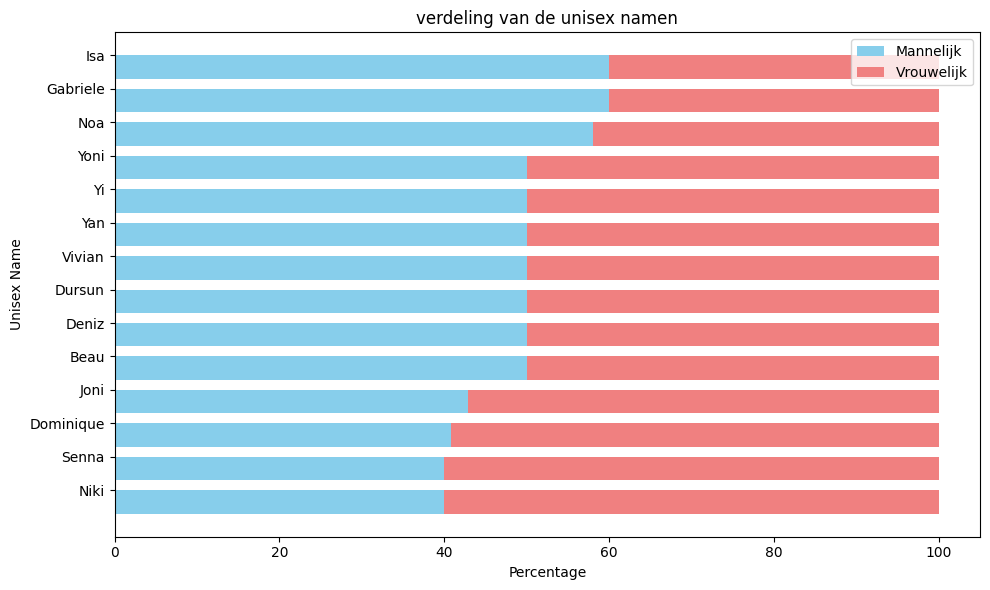

In [5]:
totaal = echte_unisex_namen_df.groupby(['naam', 'geslacht']).size().unstack(fill_value=0)
totaal['Totaal'] = totaal['Mannelijk'] + totaal['Vrouwelijk']
totaal['Percentage Mannelijk'] = (totaal['Mannelijk'] / totaal['Totaal']) * 100
totaal['Percentage Vrouwelijk'] = (totaal['Vrouwelijk'] / totaal['Totaal']) * 100
totaal.sort_values(by='Percentage Mannelijk', inplace=True)


plt.figure(figsize=(10, 6))

bar_width = 0.7
indices = np.arange(len(totaal))

plt.barh(indices, totaal['Percentage Mannelijk'], height=bar_width, label='Mannelijk', color='skyblue')
plt.barh(indices, totaal['Percentage Vrouwelijk'], left=totaal['Percentage Mannelijk'], height=bar_width, label='Vrouwelijk', color='lightcoral')


plt.yticks(indices + bar_width / 2, totaal.index)
plt.xlabel('Percentage')
plt.ylabel('Unisex Name')
plt.title('verdeling van de unisex namen')
plt.legend()
plt.tight_layout()
plt.show()

### Onderzoek 2: de accuraatheid van de geschatte bevallingsdatum
#### Evolutie vergelijken

Maak een afbeelding van het totaal aantal geboortes per dag en het totaal aantal verwachte geboortes.

**Bonusvraag**: Gewoon om over na te denken: waarom zien de uiteindes van je plot er wat gek uit? Schrijf het antwoord neer in een strategisch geplaatste markdown cel.

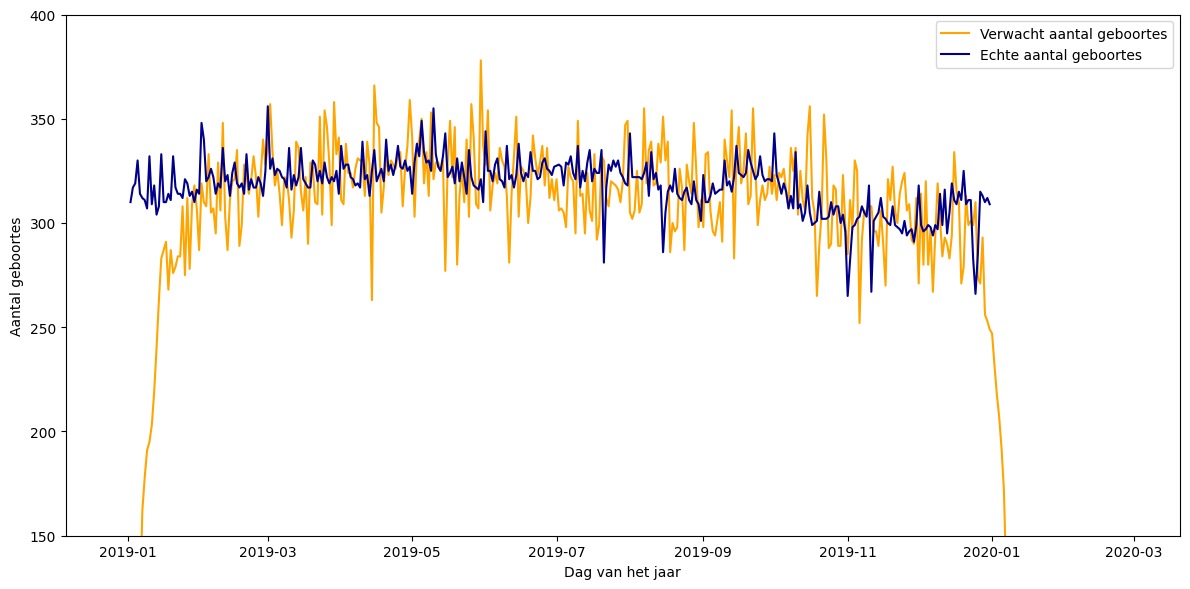

In [6]:

actuele_counts_df =  date_filtered_data.sort_values(by='bron_datum')
verwachte_counts_df = date_filtered_data.sort_values(by='verwachte_datum')
actuele_counts = actuele_counts_df.groupby('bron_datum').size()
verwachte_counts = verwachte_counts_df.groupby('verwachte_datum').size()

plt.figure(figsize=(12, 6))


plt.plot(verwachte_counts.index, verwachte_counts.values, label='Verwacht aantal geboortes', color='orange') # actuele counts mist data voor '2019-01-01', '2019-07-01' dus best eerst verwachte data plotten om zo al de x-punten te hebben
plt.plot(actuele_counts.index, actuele_counts.values, label='Echte aantal geboortes', color='darkblue')

plt.xlabel('Dag van het jaar')
plt.ylim((150,400))
plt.ylabel('Aantal geboortes')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

**Bonusvraag**

Zoals je hieronder kan zien, zijn er voorspellingen die dagen voor de actuele datum zijn en (wat minder) voorspellingen na de actuele geboortes. Er zijn er voorspellingen die hier wegvallen en bij de data van 2018 zouden komen en eneneens voorspellinegn die hier wegvallen om bij de data van 2020 te komen. Normaal gezien zouden er voorspellingen van 2018 en 2020 bij in deze data komen indien we bredere data zouden hebben. Aangezien wij geen data hebben van 2018 en 2020, hebben we dus aan de rand van de trend een 'tekort' aan voorspellingen tov de actuele geboortes

#### Verbanden bekijken
Maak een histogram van het aantal dagen dat babies te vroeg geboren werden in 2019 en een scatterplot die het verband toont tussen de verwachte en effectieve geboortedatum.

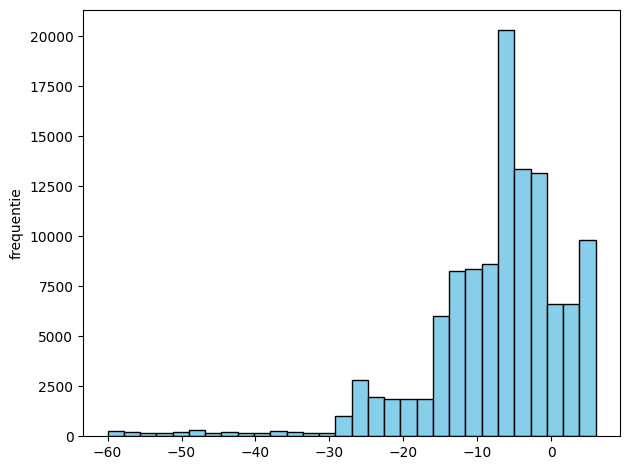

In [7]:
date_filtered_data['dagen_verschil'] = (date_filtered_data['bron_datum'] - date_filtered_data['verwachte_datum']).dt.days
plt.hist(date_filtered_data['dagen_verschil'], bins=30, color='skyblue', edgecolor='black')
plt.ylabel('frequentie')
plt.grid(False)
plt.tight_layout()
plt.show()

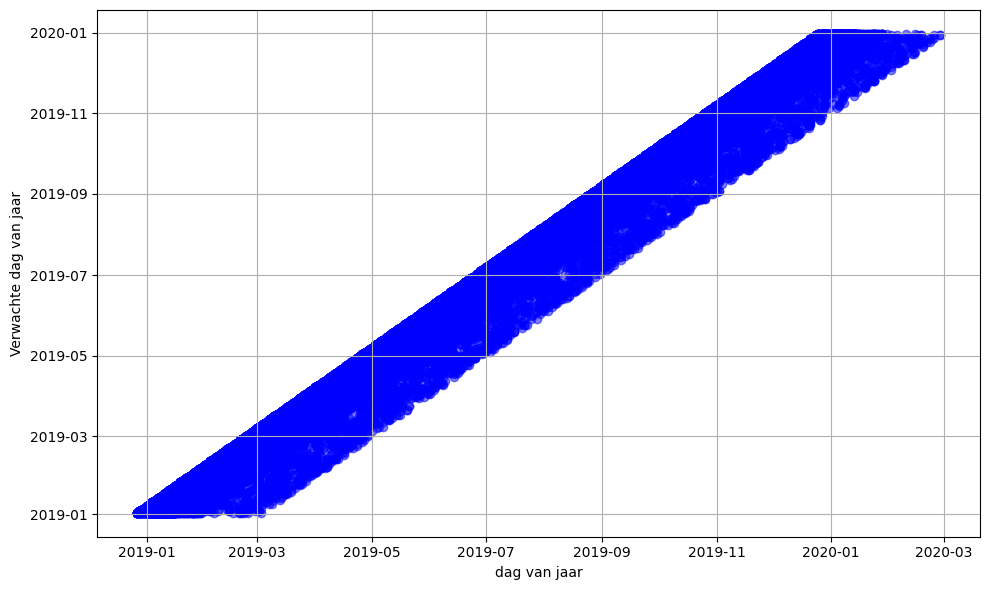

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(date_filtered_data['verwachte_datum'], date_filtered_data['bron_datum'], color='blue', alpha=0.5)

plt.xlabel('dag van jaar')
plt.ylabel('Verwachte dag van jaar')
plt.grid(True)
plt.tight_layout()
plt.show()

### Onderzoek 3: Aantal namen versus aantal babies
Naarmate dat er meer babies geboren worden, gaan deze ook meer verschillende namen krijgen. Zolang er weinig babies geboren worden lijkt het logisch dat dit verband min of meer lineair is, maar naarmate dat er meer en meer babies geboren worden lijkt het niet meer logisch dat dit verband lineair blijft. We verwachten bijvoorbeeld niet dat het aantal unieke namen gegeven aan 2 miljoen babies het dubbel is van het aantal unieke namen gegeven aan 1 miljoen babies. Kan je op basis van deze dataset het verband tussen het aantal unieke namen in functie van het aantal babies eens onderzoeken? Hiervoor krijg je geen voorstel tot visualizatie maar moet je zelf mij proberen te overtuigen van je antwoord.

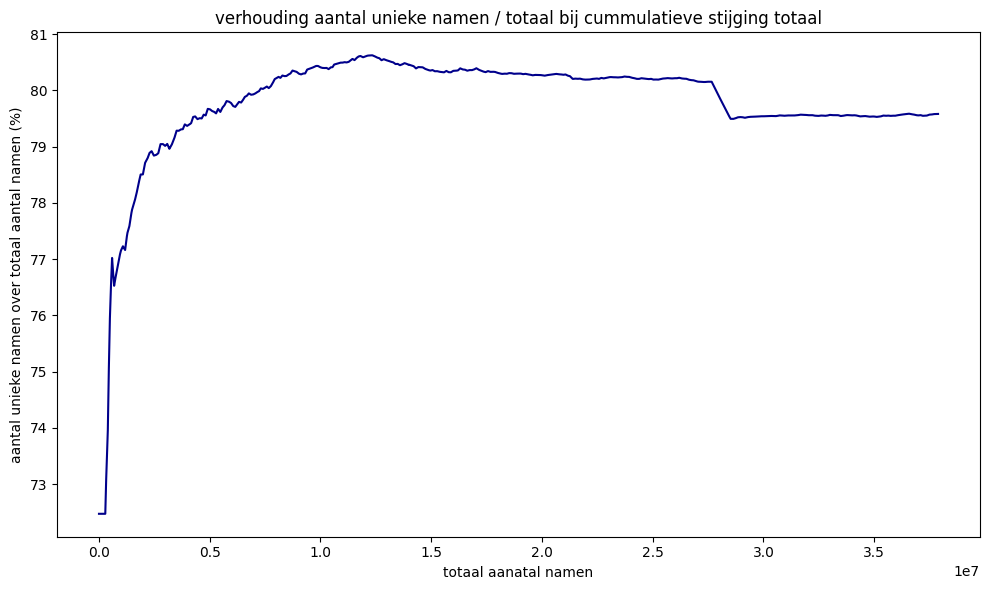

In [9]:
hulp_data = source_data.copy()

total_count_cumulative = hulp_data.groupby('bron_datum')['naam'].transform('count').cumsum()
unique_count = hulp_data.groupby('bron_datum')['naam'].transform('nunique').cumsum() *100
ratio_unique_total = unique_count / total_count_cumulative

plt.figure(figsize=(10, 6))

plt.plot(total_count_cumulative, ratio_unique_total, color='darkblue')
plt.xlabel('totaal aanatal namen')
plt.ylabel('aantal unieke namen over totaal aantal namen (%)')
plt.title('verhouding aantal unieke namen / totaal bij cummulatieve stijging totaal')
plt.grid(False)
plt.tight_layout()
plt.show()
